# **Equipo C - 2024 - 1**

# **MODELO SVC**

# **1.** **Importación de librerías necesarias para análisis de datos y modelado.**

# Importación de Librerías Estándar:

In [1]:
# Importa la librería pandas con el alias pd, que es ampliamente usada para la manipulación y análisis de datos.
import pandas as pd 
# Importa el módulo pyplot de matplotlib con el alias plt, utilizado para crear gráficos.
import matplotlib.pyplot as plt
# Importa la librería NumPy con el alias np, que proporciona soporte para arrays y funciones matemáticas de alto nivel.
import numpy as np
# Importa el módulo style de matplotlib, que permite cambiar el estilo de los gráficos.
from matplotlib import style
# Importa la librería Seaborn con el alias sns, 
# que se usa para visualización de datos basada en matplotlib y proporciona una interfaz de alto nivel.
import seaborn as sns
# Importa el módulo sys, que proporciona acceso 
# a variables y funciones que interactúan fuertemente con el intérprete de Python.
import sys
# Importa el módulo warnings, que permite controlar el comportamiento de las advertencias en Python.
import warnings

# Captura de Fecha y Hora Actual


In [2]:
pd.Timestamp.today().strftime('%Y-%m-%d %H:%M:%S') # Se capturaa la fecha y hora actual

'2024-06-16 20:28:36'

# Configuración de Estilo de Gráficos

In [3]:
from matplotlib.pylab import rcParams
# Aplica el estilo ggplot a los gráficos de matplotlib
plt.style.use('ggplot')
# Configura el tamaño de las figuras a 10 por 5 pulgadas.
rcParams['figure.figsize'] = 10,5
# Establece el color de fondo de los ejes de los gráficos a blanco.
plt.rcParams['axes.facecolor'] = 'white'

# Configuración de Advertencias

In [4]:
# Configura Python para ignorar todas las advertencias. 
# Esto es útil para evitar que las advertencias ensucien la salida del script.
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Importación de Librerías Personalizadas de Machine Learning

In [5]:
# Importa la clase SVC (Support Vector Classification) del módulo svm de scikit-learn. 
# SVC es el algoritmo de clasificación de máquinas de soporte vectorial que se utilizará para clasificar 
# los días según los precios de las acciones.
from sklearn.svm import SVC

# Importa la función accuracy_score del módulo metrics de scikit-learn. 
# Esta función se utiliza para calcular la precisión del modelo de clasificación, 
# comparando las etiquetas predichas con las etiquetas verdaderas.
from sklearn.metrics import accuracy_score

# yfinance se utiliza para descargar datos financieros históricos, 
# como los precios de las acciones, directamente desde Yahoo Finance.
import yfinance as yf

**Explicacion General**

1. **SVC:** Se utilizará SVC para entrenar un modelo de clasificación que pueda predecir si un día determinado se clasifica como un día con precios de acciones altos o bajos, basándose en características específicas de los datos de las acciones.
2. **accuracy_score:** Una vez que se entrene y se pruebe el modelo, accuracy_score se utilizará para evaluar el rendimiento del modelo midiendo la precisión de las predicciones.
3. **yfinance:** yfinance permitirá obtener datos históricos de los precios de las acciones necesarios para entrenar y evaluar el modelo.

# **2.** **Extracción de datos financieros desde Yahoo Finance.**

# Establecimiento de Fechas de Inicio y Finalización

In [6]:
# Se establece la fecha de inicio para los datos de precios

# Define la fecha de inicio para la extracción de datos de precios como el 1 de enero de 2015.
start_date = '2015-01-01' 
print(start_date)
print(type(start_date))

# Establecer fechas finalización para los datos de precios

# Define la fecha de finalización para la extracción de datos de precios como la fecha actual, formateada en YYYY-MM-DD. 
end_date = pd.Timestamp.today().strftime('%Y-%m-%d') 
print(end_date)
print(type(end_date))

2015-01-01
<class 'str'>
2024-06-16
<class 'str'>


# Extracción de datos

In [7]:
# Se obtienen los datos de precios de First Majestic Silver Corp de Yahoo Finance

# Utiliza yfinance para descargar los datos históricos de precios de First Majestic Silver Corp (FSM) de Yahoo Financee, 
# desde la fecha de inicio hasta la fecha de finalización. 
# El resultado se guarda en el DataFrame df.
df = yf.download('FSM', start=start_date, end=end_date)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400
...,...,...,...,...,...,...
2024-06-10,5.04,5.10,4.92,5.07,5.07,7541500
2024-06-11,5.00,5.10,4.94,4.96,4.96,5870300
2024-06-12,5.12,5.18,4.99,5.01,5.01,6992400


# Exploración del DataFrame

In [8]:
# DATAFRAME de Pandas

#Tipo del objeto df
print(type(df))
# Muestra el número de filas en el DataFrame df.
display(len(df))
# Muestra un resumen del DataFrame, incluyendo el tipo de datos de cada columna y el número de valores no nulos.
display(df.info())

<class 'pandas.core.frame.DataFrame'>


2379

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2379 entries, 2015-01-02 to 2024-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2379 non-null   float64
 1   High       2379 non-null   float64
 2   Low        2379 non-null   float64
 3   Close      2379 non-null   float64
 4   Adj Close  2379 non-null   float64
 5   Volume     2379 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 130.1 KB


None

In [9]:
# Proporciona estadísticas descriptivas resumidas de las columnas numéricas del DataFrame.
display(df.describe())

,Open,High,Low,Close,Adj Close,Volume
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2.379000e+03
mean,4.413464,4.514573,4.302270,4.405624,4.405624,2.702551e+06
std,1.519777,1.552549,1.474789,1.516372,1.516372,2.520861e+06
min,1.660000,2.150000,1.470000,1.800000,1.800000,6.320000e+04
25%,3.310000,3.410000,3.250000,3.310000,3.310000,8.747000e+05
50%,4.000000,4.090000,3.890000,3.990000,3.990000,2.099400e+06
75%,5.200000,5.300000,5.090000,5.190000,5.190000,3.887950e+06
max,9.490000,9.850000,9.160000,9.540000,9.540000,3.585730e+07


In [10]:
# Muestra una muestra aleatoria de 2 filas del DataFrame.
display(df.sample(2))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,3.67,3.78,3.63,3.66,3.66,1388500
2018-05-08,5.65,5.78,5.62,5.71,5.71,604300


In [11]:
# Muestra el DataFrame completo.
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400
...,...,...,...,...,...,...
2024-06-10,5.04,5.10,4.92,5.07,5.07,7541500
2024-06-11,5.00,5.10,4.94,4.96,4.96,5870300
2024-06-12,5.12,5.18,4.99,5.01,5.01,6992400


**Resumen:**

1. Se define el rango de fechas para la extracción de datos históricos de precios de Bitcoin.
2. Se utiliza yfinance para descargar los datos correspondientes desde Yahoo Finance.
3. Se explora y visualiza el DataFrame resultante utilizando varios métodos de pandas para entender mejor la estructura y contenido de los datos.

# **3.** **Visualización de datos para entender las tendencias.**

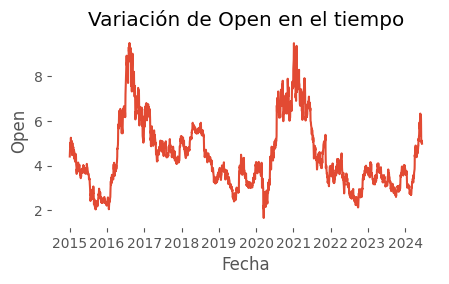

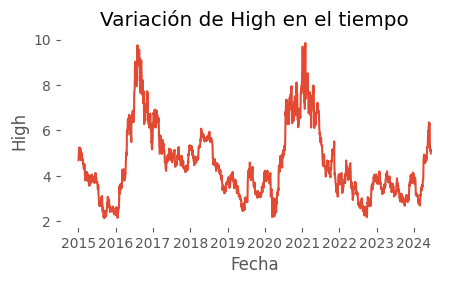

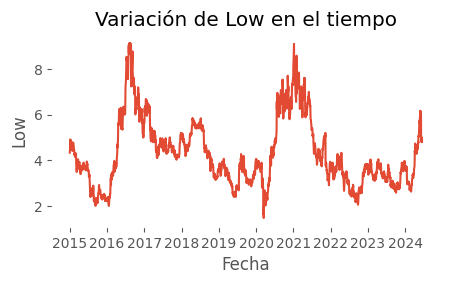

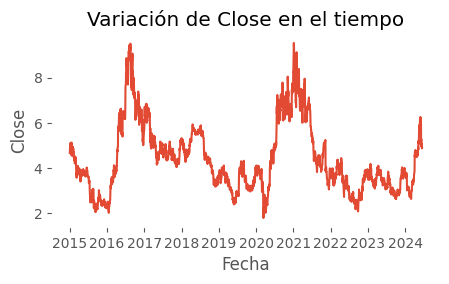

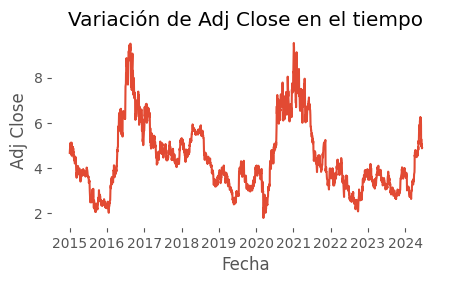

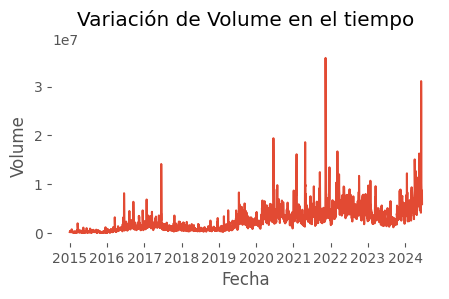

In [12]:
# Iterar sobre cada columna del DataFrame excepto la columna de índice
for column in df.columns:
    plt.figure(figsize=(5, 2.5))  # Establecer el tamaño de la figura
    plt.plot(df.index, df[column])  # Graficar la columna en función del índice (fecha)
    plt.title(f'Variación de {column} en el tiempo')  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje x
    plt.ylabel(column)  # Etiqueta del eje y
    plt.grid(True)  # Habilitar la cuadrícula en el gráfico
    plt.show()  # Mostrar el gráfico

# Visualización de Pares de Variables con Seaborn

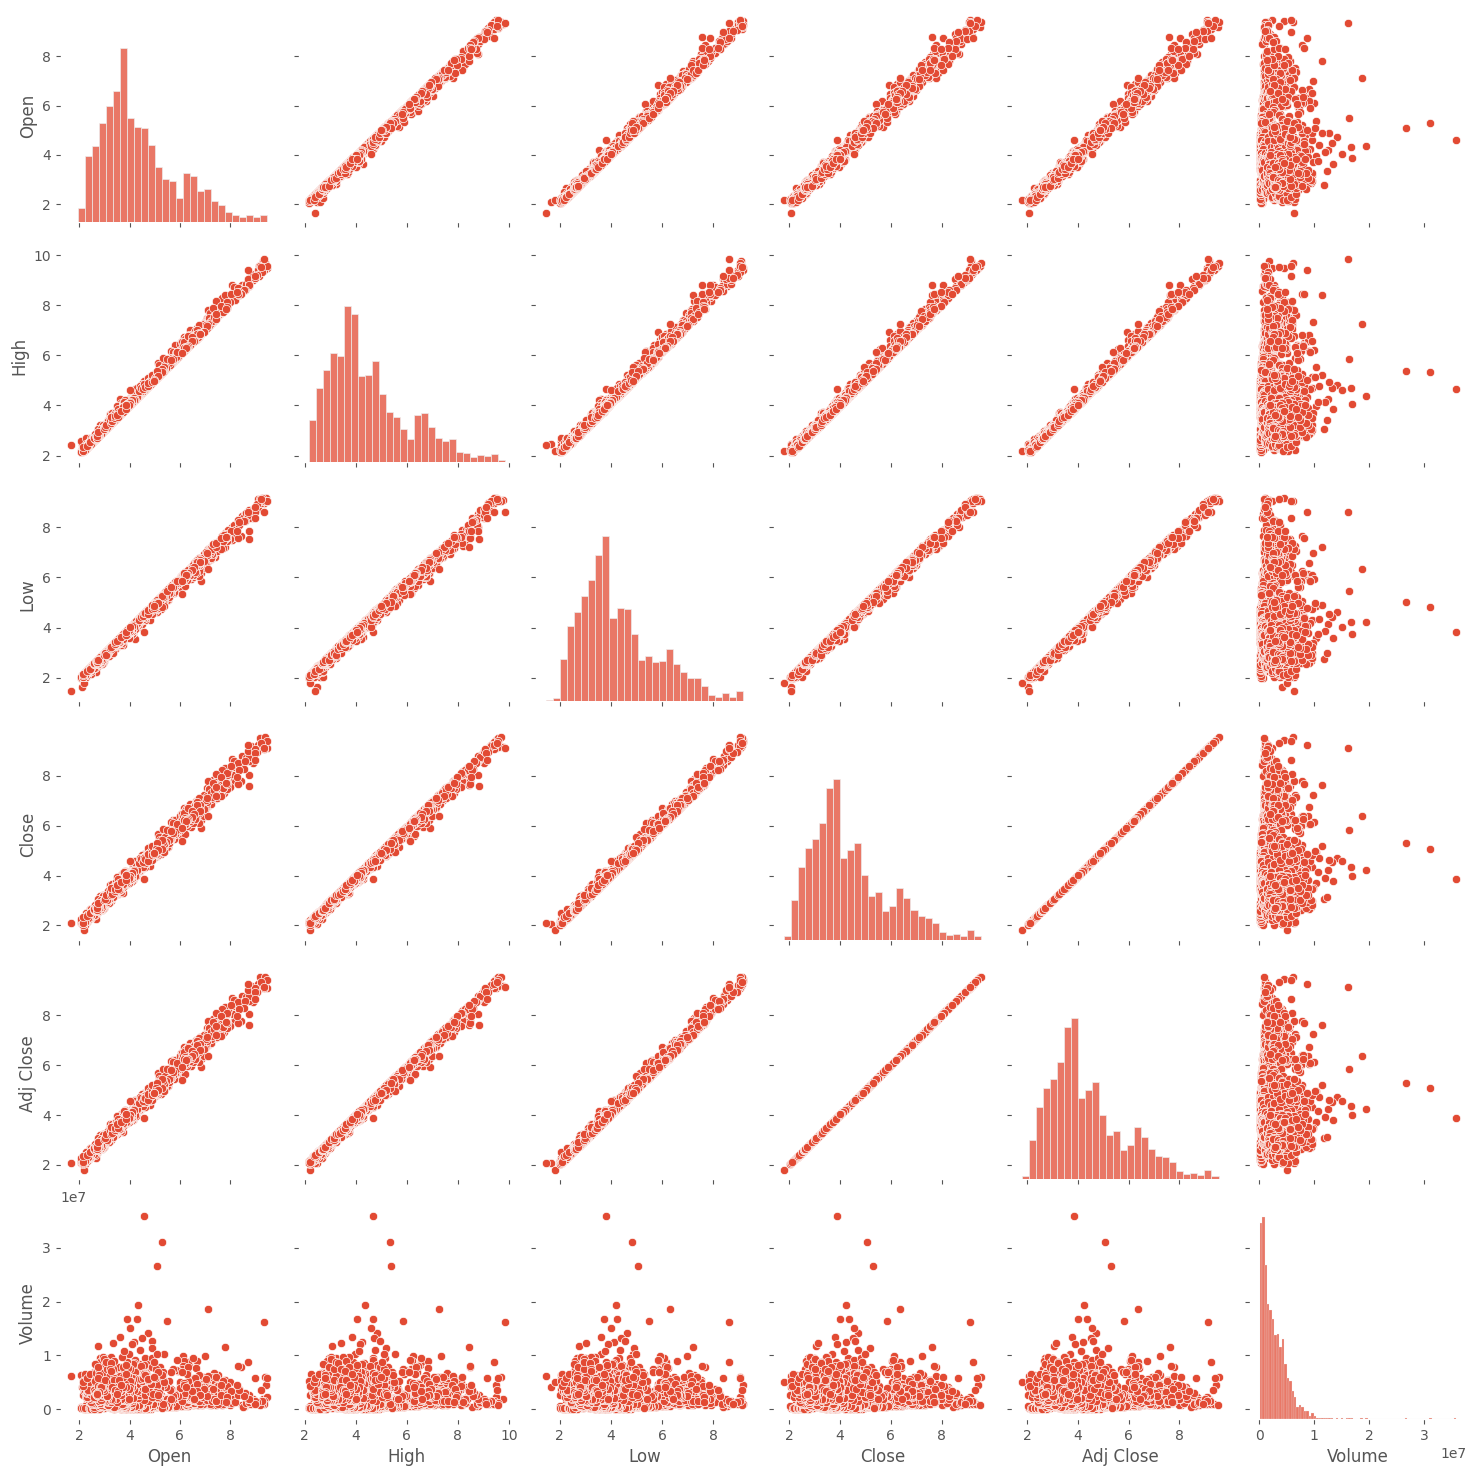

In [13]:
sns.pairplot(df) # Utiliza Seaborn para crear un gráfico de pares (pairplot) del DataFrame

# **4.** **Transformación y preprocesamiento de datos para crear características y la variable objetivo.**

# Agregar la Columna de Fecha

In [14]:
# Añade una nueva columna llamada Date al DataFrame df, que contiene los valores del índice del DataFrame.
df['Date'] = df.index
# Muestra una muestra aleatoria de 2 filas del DataFrame para una inspección rápida.
df.sample(2)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-11-17,3.37,3.47,3.29,3.44,3.44,5024300,2022-11-17
2016-11-18,6.17,6.28,5.93,6.13,6.13,2094500,2016-11-18


# Mostrar Información del DataFrame

In [15]:
# Muestra información sobre el DataFrame, incluyendo el número de entradas, 
# nombres de columnas, tipos de datos y la cantidad de valores no nulos en cada columna.
display( df.info() )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2379 entries, 2015-01-02 to 2024-06-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       2379 non-null   float64       
 1   High       2379 non-null   float64       
 2   Low        2379 non-null   float64       
 3   Close      2379 non-null   float64       
 4   Adj Close  2379 non-null   float64       
 5   Volume     2379 non-null   int64         
 6   Date       2379 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 148.7 KB


None

# Creación de Variables Calculadas

### Variable Calculada x(1): Rango de la Vela

In [16]:
# Representa la diferencia entre los precios de apertura y cierre de cada día, dando una indicación de la 
# dirección del movimiento diario del precio.
df['Open-Close'] = df.Open - df.Close

df.sample(2)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close
Date,,,,,,,,
2020-06-23,4.74,4.99,4.63,4.95,4.95,5276200,2020-06-23,-0.21
2016-06-07,6.22,6.42,6.18,6.32,6.32,774800,2016-06-07,-0.10


### Variable Calculada x(2): Rango de la Aguja

In [17]:
# Representa la diferencia entre los precios máximo y mínimo de cada día, 
# proporcionando una medida de la volatilidad diaria.
df['High-Low'] = df.High - df.Low

df.sample(2)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low
Date,,,,,,,,,
2022-08-16,2.65,2.71,2.63,2.69,2.69,3320700,2022-08-16,-0.04,0.08
2016-11-25,6.13,6.13,5.98,6.04,6.04,633800,2016-11-25,0.09,0.15


# Formación de la Matriz X
### Selección de Variables Predictoras

In [18]:
# Formar nuestra MATRIZ "X":
# Almacene todas las variables predictivas en una variable X

# Crea una nueva variable X que contiene solo las columnas Open-Close y High-Low del DataFrame df. 
# Estas columnas son las variables predictoras que se utilizarán para entrenar el modelo.
X = df[['Open-Close', 'High-Low']]

X.sample(2)

,Open-Close,High-Low
Date,,
2019-10-11,0.11,0.12
2019-10-10,0.01,0.11


# Formación del Campo de Retornos Reales
### Cálculo de Retornos

In [19]:
# Formar nuestro campo Retornos % Reales:

# Añade una nueva columna Return al DataFrame df, 
# que contiene los retornos porcentuales diarios calculados con la función 
df['Return'] = df.Close.pct_change()

df

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low,Return
Date,,,,,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900,2015-01-02,-0.27,0.35,NaN
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600,2015-01-05,-0.21,0.39,0.049145
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000,2015-01-06,-0.21,0.34,0.036660
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000,2015-01-07,0.05,0.31,-0.021611
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400,2015-01-08,0.04,0.41,-0.018072
...,...,...,...,...,...,...,...,...,...,...
2024-06-10,5.04,5.10,4.92,5.07,5.07,7541500,2024-06-10,-0.03,0.18,0.020121
2024-06-11,5.00,5.10,4.94,4.96,4.96,5870300,2024-06-11,0.04,0.16,-0.021696
2024-06-12,5.12,5.18,4.99,5.01,5.01,6992400,2024-06-12,0.11,0.19,0.010081


# Formación del Campo Etiqueta Binaria "Trend"
### Desplazamiento y Cálculo de la Tendencia

In [20]:
df['Close'].head(3)

Date
2015-01-02    4.68
2015-01-05    4.91
2015-01-06    5.09
Name: Close, dtype: float64

In [21]:
# Desplaza los valores de la columna Close una posición hacia arriba. 
# Esto significa que el valor de cierre de mañana estará en la fila de hoy.
df['Close'].shift(-1).head(3)

Date
2015-01-02    4.91
2015-01-05    5.09
2015-01-06    4.98
Name: Close, dtype: float64

In [22]:
# Compara el precio de cierre de mañana con el de hoy. 
# Si el precio de cierre de mañana es mayor que el de hoy, devuelve True, de lo contrario, False.
df['Close'].shift(-1).head(3) > df['Close'].head(3)

Date
2015-01-02     True
2015-01-05     True
2015-01-06    False
Name: Close, dtype: bool

In [23]:
# Variable objetivo

# Crea un array y_real donde los valores son 1 si el precio de cierre de mañana es mayor que el de hoy y 0 si no lo es. 
# Esto se utilizará como la variable objetivo en el modelo de clasificación.
y_real = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

### Inspección de y_real

In [24]:
# Imprime el tipo de y_real, que será un array de NumPy.
print(type( y_real ))
# Muestra la longitud de y_real.
display(len( y_real ))
# Muestra el contenido de y_real.
display( y_real) 

<class 'numpy.ndarray'>


2379

array([1, 1, 0, ..., 0, 1, 0])

### Ajuste de la Longitud de y_real y X

In [25]:
len(y_real)

2379

In [26]:
# Toma los primeros 2364 elementos del array y_real.
y_real[:2364]

array([1, 1, 0, ..., 0, 1, 1])

In [27]:
# Asigna los primeros 3191 elementos de y_real a y_real_total.
y_real_total = y_real[:2364]

len(y_real_total)

2364

In [28]:
len(X)

2379

### Ajuste de la Longitud del DataFrame df

In [29]:
# Toma las primeras 2364 filas de la matriz X.
X=X.head(2364)

len(X)

2364

In [30]:
len(df)

2379

In [31]:
# Toma las primeras 2364 filas del DataFrame df.
df=df.head(2364)

len(df)

2364

**Resumen:**
1. Se crea la matriz de características X usando las variables calculadas Open-Close y High-Low.
2. Se añade una columna Return que contiene el cambio porcentual en el precio de cierre.
3. Se genera la variable objetivo y_real basada en si el precio de cierre de mañana es mayor que el de hoy.
4. Se ajusta la longitud de y_real y X para asegurar que ambos tengan el mismo número de filas.
5. Se ajusta la longitud del DataFrame df para que coincida con la longitud de X y y_real.

# **5.** **Partición de datos en conjuntos de entrenamiento y prueba.**
## Definir el Porcentaje de División y Calcular el Punto de División

In [32]:
# Define el porcentaje del conjunto de datos que se utilizará para el entrenamiento. En este caso, el 80%.
split_percentage = 0.80
# Calcula el índice de división en función del porcentaje definido y el número total de filas en el DataFrame df.
split = int(split_percentage * len(df))
# Índice donde se separan los datos de entrenamiento y prueba.
split

1891

## Crear el Conjunto de Entrenamiento

#### Particionar los Datos de Entrenamiento

In [33]:
# Train data set

# Selecciona las primeras split filas de la matriz X para formar el conjunto de características de entrenamiento.
X_train_real = X[:split]
# Selecciona las primeras split filas del array y_real_total para formar el conjunto de etiquetas de entrenamiento.
y_train_real = y_real_total[:split]

#### Inspección del Conjunto de Entrenamiento

In [34]:
print(type(X_train_real))
display(len(X_train_real)) 
display(X_train_real.head(3)) 

print(type(y_train_real))
display(len(y_train_real)) 
display(y_train_real[:3]) 

<class 'pandas.core.frame.DataFrame'>


1891

,Open-Close,High-Low
Date,,
2015-01-02,-0.27,0.35
2015-01-05,-0.21,0.39
2015-01-06,-0.21,0.34


<class 'numpy.ndarray'>


1891

array([1, 1, 0])

## Crear el Conjunto de Prueba

#### Particionar los Datos de Prueba

In [35]:
# Test data set

# Selecciona las filas desde split hasta el final de la matriz X para formar el conjunto de características de prueba.
X_prueba_real = X[split:]

# Selecciona las filas desde split hasta el final del array y_real_total para formar el conjunto de etiquetas de prueba.
y_prueba_real = y_real_total[split:]

#### Inspección del Conjunto de Prueba

In [36]:
print(type(X_prueba_real))
display(len(X_prueba_real)) 
display(X_prueba_real.head(3)) 

print(type(y_prueba_real))
display(len(y_prueba_real)) 
display(y_prueba_real[:3]) 

<class 'pandas.core.frame.DataFrame'>


473

,Open-Close,High-Low
Date,,
2022-07-08,0.01,0.14
2022-07-11,0.06,0.12
2022-07-12,0.05,0.15


<class 'numpy.ndarray'>


473

array([0, 0, 1])

**Resumen**

1. Se define el porcentaje de datos que se utilizarán para el entrenamiento.
2. Se calcula el índice de división basado en el porcentaje y el número total de filas en el DataFrame.
3. Se crea el conjunto de entrenamiento seleccionando las primeras split filas de X y y_real_total.
4. Se crea el conjunto de prueba seleccionando las filas desde split hasta el final de X y y_real_total.
5. Se inspecciona los conjuntos de entrenamiento y prueba para asegurar que la partición se ha realizado correctamente.

# **6.** **Creación y entrenamiento del modelo SVC.**

In [37]:
# Support vector classifier

# Crea una instancia del clasificador de vectores de soporte 
# (Support Vector Classifier) utilizando la clase SVC de scikit-learn.
Modelo_SVC1 = SVC()
# Muestra la configuración del modelo.
Modelo_SVC1

SVC()

## Ajustar el Modelo

In [38]:
%%time
# Entrena el modelo Modelo_SVC1 utilizando los datos de 
# entrenamiento X_train_real (características) y y_train_real (etiquetas).
Modelo_SVC1.fit(X_train_real, y_train_real)

CPU times: total: 62.5 ms
Wall time: 89 ms


SVC()

## Inspeccionar el Modelo Ajustado

In [39]:
# Muestra el número de características que el modelo ha utilizado.
Modelo_SVC1.n_features_in_

2

In [40]:
# Muestra los nombres de las características.
Modelo_SVC1.feature_names_in_

array(['Open-Close', 'High-Low'], dtype=object)

In [41]:
# Muestra el intercepto del modelo.
Modelo_SVC1.intercept_

array([0.06866516])

# **7.** **Generación de predicciones y cálculo de retornos de la estrategia**

## Predicción con el Modelo Ajustado

#### Añadir la Etiqueta Real al DataFrame

In [42]:
# Añade el array y_real_total al DataFrame df como una nueva columna y_real_total.
df["y_real_total"] = y_real_total

df

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low,Return,y_real_total
Date,,,,,,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900,2015-01-02,-0.27,0.35,NaN,1
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600,2015-01-05,-0.21,0.39,0.049145,1
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000,2015-01-06,-0.21,0.34,0.036660,0
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000,2015-01-07,0.05,0.31,-0.021611,0
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400,2015-01-08,0.04,0.41,-0.018072,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,5.50,5.84,5.48,5.84,5.84,16308000,2024-05-17,-0.34,0.36,0.075507,1
2024-05-20,5.93,5.99,5.76,5.92,5.92,7062000,2024-05-20,0.01,0.23,0.013699,0
2024-05-21,5.85,5.92,5.76,5.83,5.83,7272500,2024-05-21,0.02,0.16,-0.015203,0


#### Generar Predicciones

In [43]:
# Utiliza el modelo ajustado Modelo_SVC1 para predecir las etiquetas para todas las filas en la matriz de características X 
# y añade las predicciones al DataFrame df como una nueva columna y_pred_total.
df['y_pred_total'] = Modelo_SVC1.predict(X)

df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low,Return,y_real_total,y_pred_total
Date,,,,,,,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900,2015-01-02,-0.27,0.35,NaN,1,0
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600,2015-01-05,-0.21,0.39,0.049145,1,0
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000,2015-01-06,-0.21,0.34,0.036660,0,0


## Cálculo de Retornos de la Estrategia

In [44]:
# Calculate strategy returns

# Calcula los retornos de la estrategia multiplicando el cambio porcentual del precio de cierre (Return) por 
# las predicciones desplazadas en una fila (y_pred_total.shift(1)). 
# Esto asume que la predicción del día anterior se usa para tomar una posición en el día actual.
df['Strategy_Return'] = df.Return *df.y_pred_total.shift(1)

df['Strategy_Return']

Date
2015-01-02    NaN
2015-01-05    0.0
2015-01-06    0.0
2015-01-07   -0.0
2015-01-08   -0.0
             ... 
2024-05-17    0.0
2024-05-20    0.0
2024-05-21   -0.0
2024-05-22   -0.0
2024-05-23    0.0
Name: Strategy_Return, Length: 2364, dtype: float64

#### Cálculo de Retornos Acumulados


In [45]:
# Calculate Cumulutive returns

# Calcula los retornos acumulados del mercado sumando acumulativamente los retornos diarios (Return).
df['Cum_Ret'] = df['Return'].cumsum()

df

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low,Return,y_real_total,y_pred_total,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900,2015-01-02,-0.27,0.35,NaN,1,0,NaN,NaN
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600,2015-01-05,-0.21,0.39,0.049145,1,0,0.0,0.049145
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000,2015-01-06,-0.21,0.34,0.036660,0,0,0.0,0.085805
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000,2015-01-07,0.05,0.31,-0.021611,0,0,-0.0,0.064194
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400,2015-01-08,0.04,0.41,-0.018072,1,0,-0.0,0.046122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,5.50,5.84,5.48,5.84,5.84,16308000,2024-05-17,-0.34,0.36,0.075507,1,0,0.0,1.937413
2024-05-20,5.93,5.99,5.76,5.92,5.92,7062000,2024-05-20,0.01,0.23,0.013699,0,0,0.0,1.951112
2024-05-21,5.85,5.92,5.76,5.83,5.83,7272500,2024-05-21,0.02,0.16,-0.015203,0,0,-0.0,1.935909


In [46]:
# Plot Strategy Cumulative returns

# Calcula los retornos acumulados de la estrategia sumando acumulativamente 
# los retornos de la estrategia (Strategy_Return).
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

df

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,High-Low,Return,y_real_total,y_pred_total,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,,
2015-01-02,4.41,4.69,4.34,4.68,4.68,248900,2015-01-02,-0.27,0.35,NaN,1,0,NaN,NaN,NaN
2015-01-05,4.70,4.94,4.55,4.91,4.91,431600,2015-01-05,-0.21,0.39,0.049145,1,0,0.0,0.049145,0.0000
2015-01-06,4.88,5.15,4.81,5.09,5.09,419000,2015-01-06,-0.21,0.34,0.036660,0,0,0.0,0.085805,0.0000
2015-01-07,5.03,5.23,4.92,4.98,4.98,387000,2015-01-07,0.05,0.31,-0.021611,0,0,-0.0,0.064194,0.0000
2015-01-08,4.93,5.16,4.75,4.89,4.89,380400,2015-01-08,0.04,0.41,-0.018072,1,0,-0.0,0.046122,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,5.50,5.84,5.48,5.84,5.84,16308000,2024-05-17,-0.34,0.36,0.075507,1,0,0.0,1.937413,2.0023
2024-05-20,5.93,5.99,5.76,5.92,5.92,7062000,2024-05-20,0.01,0.23,0.013699,0,0,0.0,1.951112,2.0023
2024-05-21,5.85,5.92,5.76,5.83,5.83,7272500,2024-05-21,0.02,0.16,-0.015203,0,0,-0.0,1.935909,2.0023


# **7.** **Visualización de resultados para analizar el rendimiento de la estrategia.**

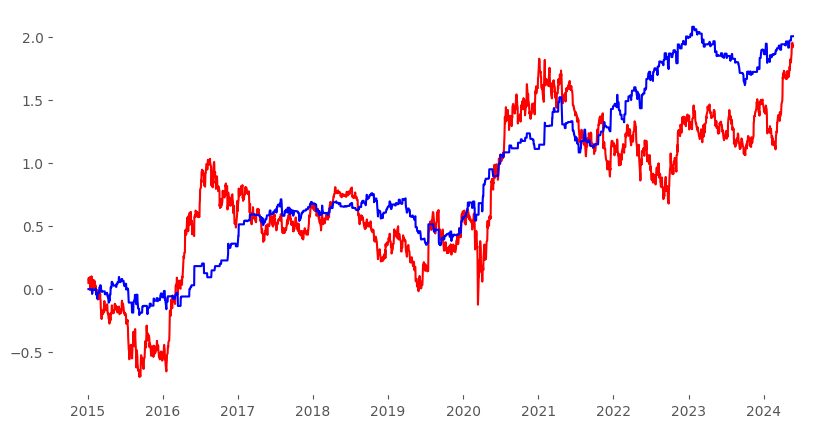

In [47]:
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

**Resumen**

1. Se crea y entrena un modelo SVC con los datos de entrenamiento.
2. Se genera predicciones para todas las filas de la matriz de características.
3. Se calcula los retornos de la estrategia basada en las predicciones del modelo.
4. Se calcula y grafica los retornos acumulados del mercado y de la estrategia para comparar su rendimiento.

# **RESUMEN GENERAL**

1. Importación de librerías necesarias para análisis de datos y modelado.
2. Extracción de datos financieros desde Yahoo Finance.
3. Visualización de datos para entender las tendencias.
4. Transformación y preprocesamiento de datos para crear características y la variable objetivo.
5. Partición de datos en conjuntos de entrenamiento y prueba.
6. Creación y entrenamiento del modelo SVC.
7. Generación de predicciones y cálculo de retornos de la estrategia.
9. Visualización de resultados para analizar el rendimiento de la estrategia.

**Este proceso proporciona una metodología completa para clasificar días con precios de acciones y evaluar el rendimiento de una estrategia de trading basada en un modelo SVC.**